# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [147]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from datetime import date
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Code found https://www.programiz.com/python-programming/datetime/current-datetime
# Finding current date for later plots.
today = date.today()
curr_date = today.strftime("%b-%d-%Y")

## Generate Cities List

In [148]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [149]:
# Set empty lists to hold characters height and mass
new_cities = []
latitudes = []
longitudes = []
max_temps = []
humidity = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

output_file = "C://Python-API-Challenge/WeatherPy/Output_Data/city_log.txt"

with open(output_file, "w") as datafile:

    # Loop through each city
    for city in cities:
    
        # Create search query, make request and store in json
        query = f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query)
        response_json = response.json()
    
        # Try to grab the height and mass of characters if they are available in the Star Wars API
        try:
        
            latitudes.append(response_json['coord']['lat'])
            longitudes.append(response_json['coord']['lon'])
            max_temps.append(response_json['main']['temp_max'])
            humidity.append(response_json['main']['humidity'])
            cloudiness.append(response_json['clouds']['all'])
            wind_speeds.append(response_json['wind']['speed'])
            countries.append(response_json['sys']['country'])
            dates.append(response_json['dt'])
            city_id = response_json['id']
            new_cities.append(city)
        
            datafile.write(f"City ID: {city_id}\n")
            datafile.write(f"City Name: {city}\n\n")
        
            print(f"{city_id} {city} was found\n")
        
        # Handle exceptions for a character that is not available in the Star Wars API
        except KeyError:
        
            datafile.write(f"{city} not found\n\n")
            print(f"{city} not found\n")
            continue

    datafile.write(f"Number of cities found: {len(new_cities)}")
    print(f"Number of cities found: {len(new_cities)}")

5870133 nome was found

5855927 hilo was found

2630299 hofn was found

5767918 pierre was found

5848280 kapaa was found

3874787 punta arenas was found

5563839 fortuna was found

taolanaro not found

3418910 upernavik was found

935215 saint-philippe was found

2206939 bluff was found

4030556 rikitea was found

64814 bandarbeyla was found

3372964 lagoa was found

3883457 lebu was found

2176639 batemans bay was found

172515 abu samrah was found

tsihombe not found

747712 edirne was found

2075265 busselton was found

5518239 canyon was found

2245170 podor was found

5880054 barrow was found

4035715 avarua was found

sorvag not found

6201424 mataura was found

5106841 albany was found

4032243 vaini was found

3996737 maneadero was found

ndiekro not found

3156980 floro was found

6185377 yellowknife was found

viligili not found

3137971 sogne was found

3471451 arraial do cabo was found

1270667 gunupur was found

nizhneyansk not found

3372707 ribeira grande was found

450

skanevik not found

2137748 voh was found

935051 lavumisa was found

1151464 phangnga was found

1512019 aksarka was found

921786 mitsamiouli was found

3696183 iquitos was found

2015306 tiksi was found

2304548 anloga was found

yomitan not found

1651591 amahai was found

2396518 port-gentil was found

613065 martvili was found

4231997 avera was found

2644210 liverpool was found

4033356 tiarei was found

3356832 henties bay was found

5354943 half moon bay was found

739209 susehri was found

4021858 guerrero negro was found

1106643 quatre cocos was found

2129218 yoichi was found

2024626 dzhebariki-khaya was found

2094342 kavieng was found

1651531 ambon was found

372884 kapoeta was found

1507390 dikson was found

2012780 zabaykalsk was found

1808744 hede was found

5392593 san ramon was found

3386213 touros was found

3408368 acarau was found

1501377 kungurtug was found

3355672 luderitz was found

606531 boden was found

3414079 olafsvik was found

6167817 torbay was

935616 le port was found

583673 aksay was found

5909294 brockville was found

2161376 kingaroy was found

3387204 soure was found

3361934 saldanha was found

901344 ndola was found

181735 othaya was found

135423 shahrud was found

3663693 jutai was found

3385077 conde was found

577240 bereznik was found

bababe not found

580660 minyar was found

Number of cities found: 558


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [151]:
weather_dict = {
    "City": new_cities,
    "Lat": latitudes,
    "Lng": longitudes,
    "Max Temp" : max_temps,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speeds,
    "Country" : countries,
    "Date" : dates
}
weather_data = pd.DataFrame(weather_dict)

# Code for writing city data to csv found https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

weather_data.to_csv(path_or_buf = "C://Python-API-Challenge/WeatherPy/Output_Data/new_cities.csv", index = False)

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nome,64.50,-165.41,25.00,85,90,16.11,US,1609463529
1,hilo,19.73,-155.09,78.80,69,20,9.17,US,1609463530
2,hofn,64.25,-15.21,29.28,87,0,6.42,IS,1609463530
3,pierre,44.37,-100.35,30.20,68,90,3.58,US,1609463530
4,kapaa,22.08,-159.32,80.60,69,40,18.34,US,1609463530


In [152]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,22.480412,20.677079,45.925358,76.372760,53.724014,7.624659,1.609464e+09
std,33.207089,90.649748,32.476745,16.426675,41.235965,5.859408,7.718171e+01
min,-54.800000,-179.170000,-46.660000,11.000000,0.000000,0.070000,1.609463e+09
25%,-4.895000,-60.582500,29.045000,69.000000,2.000000,3.360000,1.609464e+09
50%,29.035000,27.260000,53.800000,79.000000,69.500000,5.980000,1.609464e+09
75%,51.040000,102.442500,73.530000,88.000000,96.000000,10.290000,1.609464e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,41.380000,1.609464e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

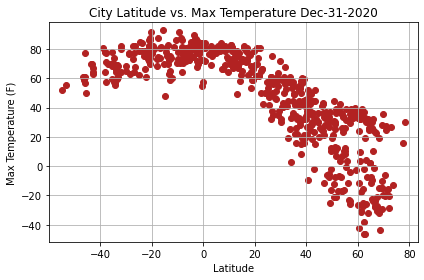

In [153]:
city_lats = weather_data['Lat']
city_max_temps = weather_data['Max Temp']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_max_temps, marker='o', facecolors='firebrick')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_max_temps)-5, max(city_max_temps)+5)

plt.grid()

output_image = f'Output_Data/LatvTemp_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Latitude vs. Humidity Plot

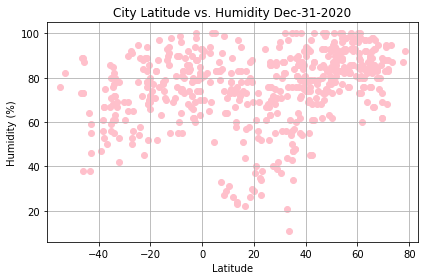

In [154]:
city_humid = weather_data['Humidity']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_humid, marker='o', facecolors='pink')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_humid)-5, max(city_humid)+5)

plt.grid()

output_image = f'Output_Data/LatvHumid_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Latitude vs. Cloudiness Plot

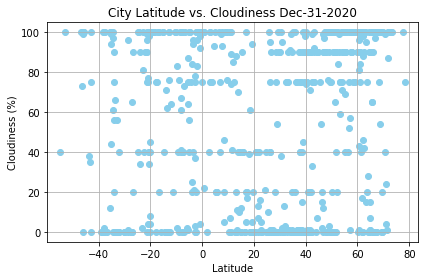

In [155]:
city_clouds = weather_data['Cloudiness']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_clouds, marker='o', facecolors='skyblue')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_clouds)-5, max(city_clouds)+5)

plt.grid()

output_image = f'Output_Data/LatvClouds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Latitude vs. Wind Speed Plot

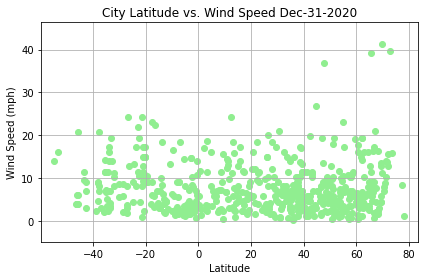

In [156]:
city_winds = weather_data['Wind Speed']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_winds, marker='o', facecolors='lightgreen')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_winds)-5, max(city_winds)+5)

plt.grid()

output_image = f'Output_Data/LatvWinds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Linear Regression

In [157]:
north_hem_weather = weather_data.loc[weather_data['Lat'] >= 0]
south_hem_weather = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8118312038284647


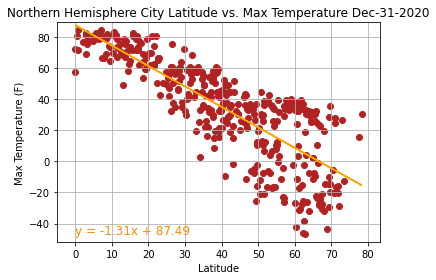

In [158]:
north_city_lats = north_hem_weather['Lat']
north_max_temps = north_hem_weather['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_max_temps)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_max_temps, marker='o', facecolors='firebrick')
plt.plot(north_city_lats, regress_values, "r-", color='orange')
plt.annotate(line_string, (min(north_city_lats), min(north_max_temps)), fontsize=12, color="darkorange")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_max_temps)-5, max(north_max_temps)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvTemp_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5225188254338132


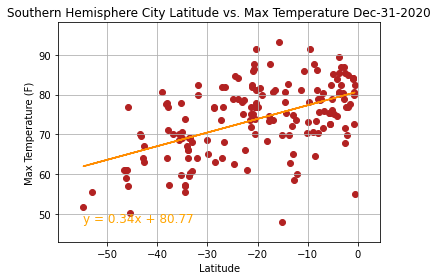

In [166]:
south_city_lats = south_hem_weather['Lat']
south_max_temps = south_hem_weather['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_max_temps)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_max_temps, marker='o', facecolors='firebrick')
plt.plot(south_city_lats, regress_values, "r-", color='darkorange')
plt.annotate(line_string,(min(south_city_lats), min(south_max_temps)), fontsize=12, color="orange")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_max_temps)-5, max(south_max_temps)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvTemp_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.39492304961345515


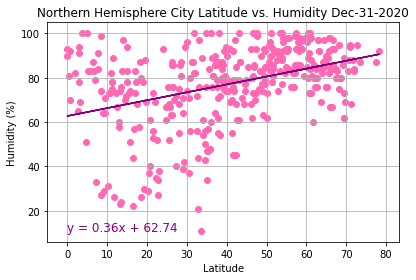

In [167]:
north_humid = north_hem_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_humid)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_humid, marker='o', facecolors='hotpink')
plt.plot(north_city_lats, regress_values, "r-", color='purple')
plt.annotate(line_string, (min(north_city_lats), min(north_humid)), fontsize=12, color="purple")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_humid)-5, max(north_humid)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvHumid_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.35556411072598915


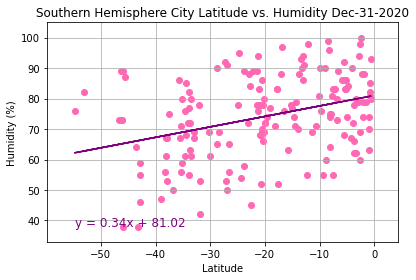

In [168]:
south_humid = south_hem_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_humid)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_humid, marker='o', facecolors='hotpink')
plt.plot(south_city_lats, regress_values, "r-", color='purple')
plt.annotate(line_string, (min(south_city_lats), min(south_humid)), fontsize=12, color="purple")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_humid)-5, max(south_humid)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvHumid_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22378380696786868


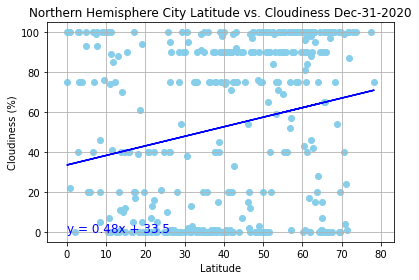

In [162]:
north_clouds = north_hem_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_clouds)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_clouds, marker='o', facecolors='skyblue')
plt.plot(north_city_lats, regress_values, "r-", color='blue')
plt.annotate(line_string, (min(north_city_lats), min(north_clouds)), fontsize=12, color="blue")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_clouds)-5, max(north_clouds)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvClouds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09748349874556078


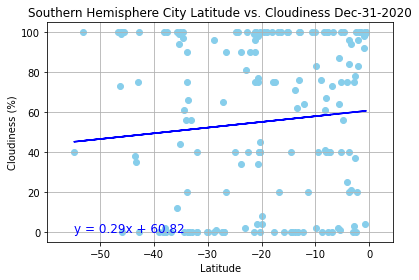

In [163]:
south_clouds = south_hem_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_clouds)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_clouds, marker='o', facecolors='skyblue')
plt.plot(south_city_lats, regress_values, "r-", color='blue')
plt.annotate(line_string, (min(south_city_lats), min(south_clouds)), fontsize=12, color="blue")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_clouds)-5, max(south_clouds)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvClouds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06592431443573636


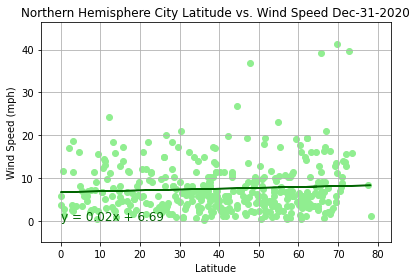

In [169]:
north_winds = north_hem_weather['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_winds)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_winds, marker='o', facecolors='lightgreen')
plt.plot(north_city_lats, regress_values, "r-", color='darkgreen')
plt.annotate(line_string, (min(north_city_lats), min(north_winds)), fontsize=12, color="darkgreen")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_winds)-5, max(north_winds)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvWinds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24806138073759992


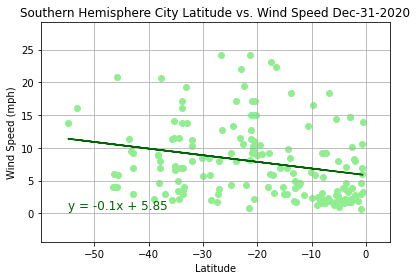

In [170]:
south_winds = south_hem_weather['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_winds)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_winds, marker='o', facecolors='lightgreen')
plt.plot(south_city_lats, regress_values, "r-", color='darkgreen')
plt.annotate(line_string, (min(south_city_lats), min(south_winds)), fontsize=12, color="darkgreen")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_winds)-5, max(south_winds)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvWinds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()